In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, r2_score, max_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset into features and class

In [2]:
body_fat = fetch_openml('bodyfat',version=1,parser='auto')

In [3]:
X_body_fat = body_fat.data
y_body_fat = body_fat.target
df_body_fat = X_body_fat.join(y_body_fat)

# Data study

In [4]:
df_body_fat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  class    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df_body_fat.isna().sum()

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
class      0
dtype: int64

In [6]:
df_body_fat.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


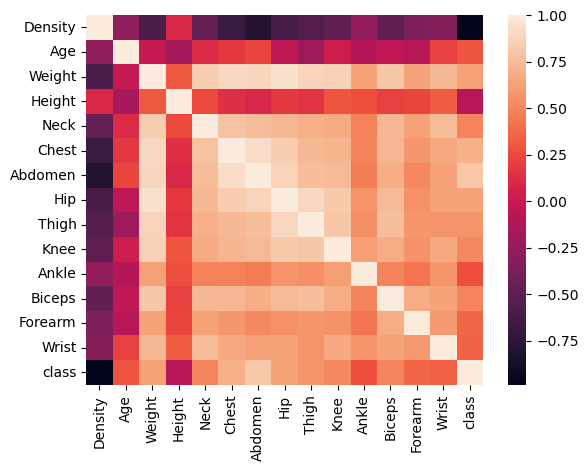

In [7]:
plt.figure()
sns.heatmap(df_body_fat.corr())
plt.show()

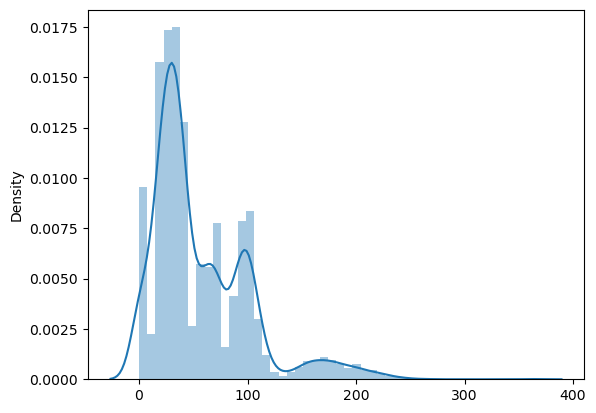

In [8]:
plt.figure()
sns.distplot(df_body_fat)
plt.show()

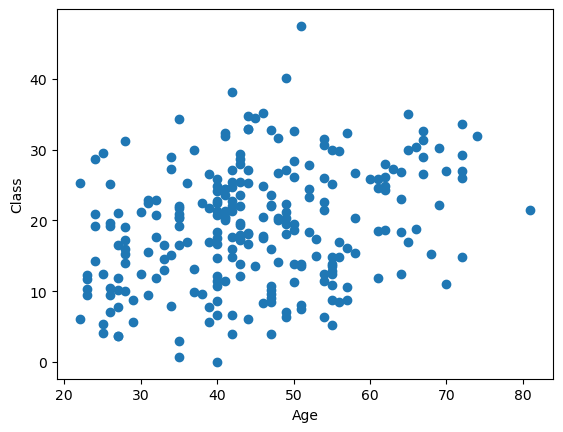

In [9]:
plt.figure()
plt.scatter(df_body_fat['Age'], df_body_fat['class'])
plt.xlabel('Age')
plt.ylabel('Class')
plt.show()

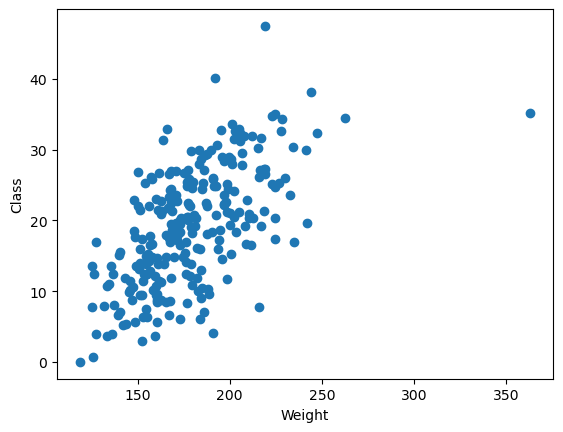

In [10]:
plt.figure()
plt.scatter(df_body_fat['Weight'], df_body_fat['class'])
plt.xlabel('Weight')
plt.ylabel('Class')
plt.show()

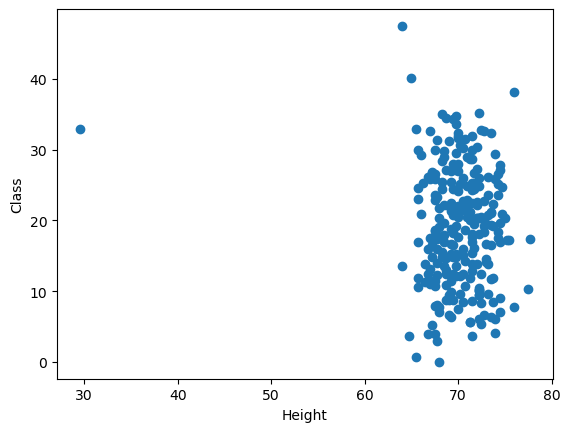

In [11]:
plt.figure()
plt.scatter(df_body_fat['Height'], df_body_fat['class'])
plt.xlabel('Height')
plt.ylabel('Class')
plt.show()

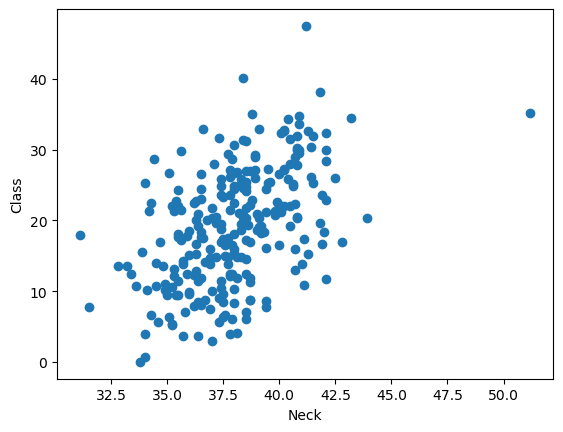

In [12]:
plt.figure()
plt.scatter(df_body_fat['Neck'], df_body_fat['class'])
plt.xlabel('Neck')
plt.ylabel('Class')
plt.show()

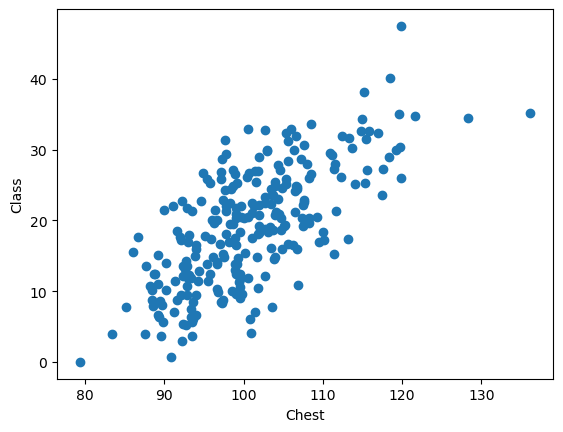

In [13]:
plt.figure()
plt.scatter(df_body_fat['Chest'], df_body_fat['class'])
plt.xlabel('Chest')
plt.ylabel('Class')
plt.show()

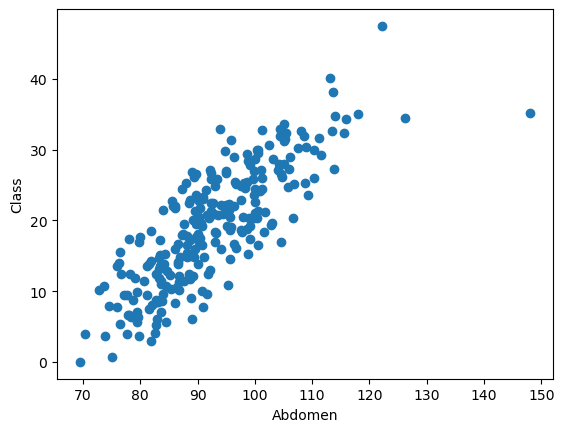

In [14]:
plt.figure()
plt.scatter(df_body_fat['Abdomen'], df_body_fat['class'])
plt.xlabel('Abdomen')
plt.ylabel('Class')
plt.show()

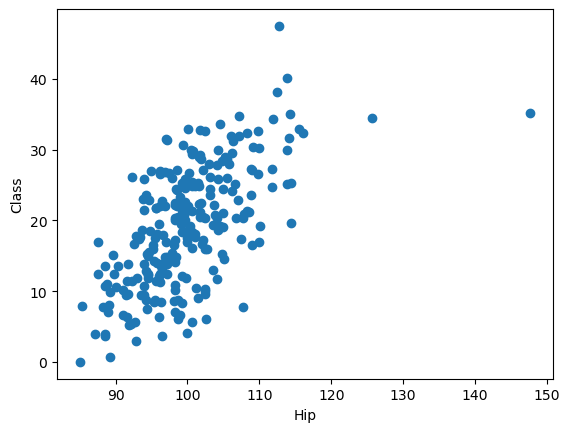

In [15]:
plt.figure()
plt.scatter(df_body_fat['Hip'], df_body_fat['class'])
plt.xlabel('Hip')
plt.ylabel('Class')
plt.show()

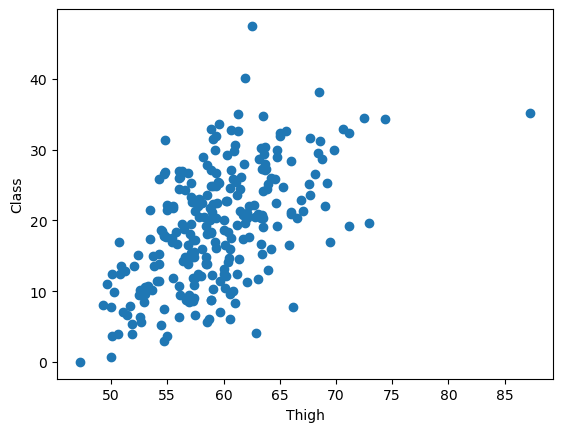

In [16]:
plt.figure()
plt.scatter(df_body_fat['Thigh'], df_body_fat['class'])
plt.xlabel('Thigh')
plt.ylabel('Class')
plt.show()

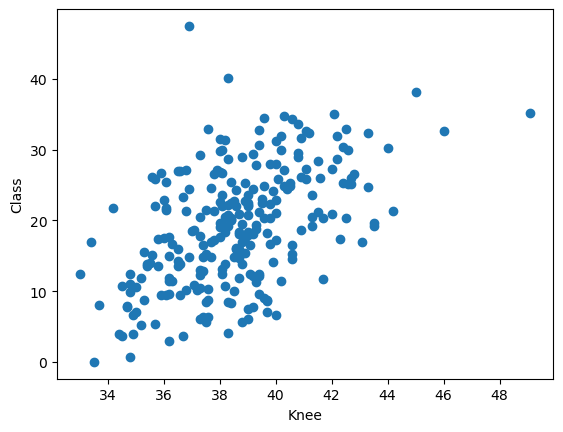

In [17]:
plt.figure()
plt.scatter(df_body_fat['Knee'], df_body_fat['class'])
plt.xlabel('Knee')
plt.ylabel('Class')
plt.show()

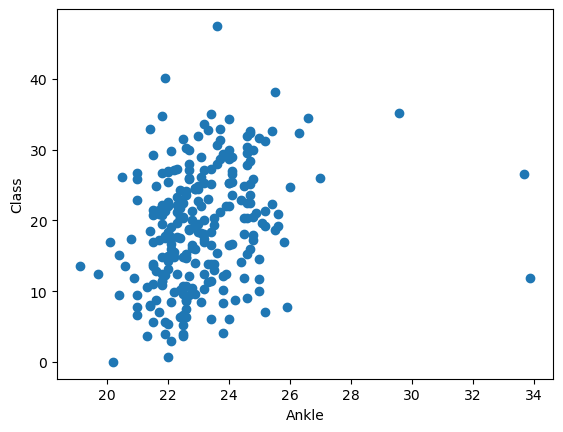

In [18]:
plt.figure()
plt.scatter(df_body_fat['Ankle'], df_body_fat['class'])
plt.xlabel('Ankle')
plt.ylabel('Class')
plt.show()

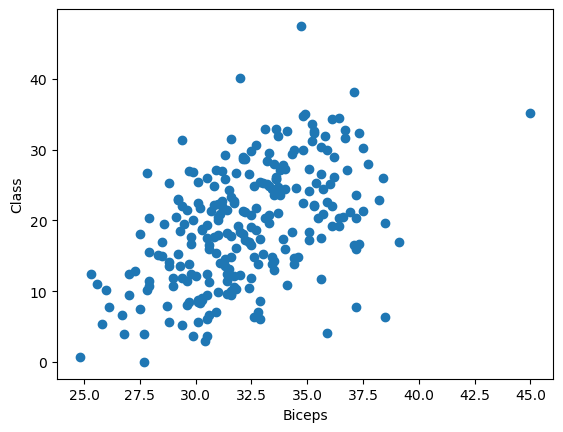

In [19]:
plt.figure()
plt.scatter(df_body_fat['Biceps'], df_body_fat['class'])
plt.xlabel('Biceps')
plt.ylabel('Class')
plt.show()

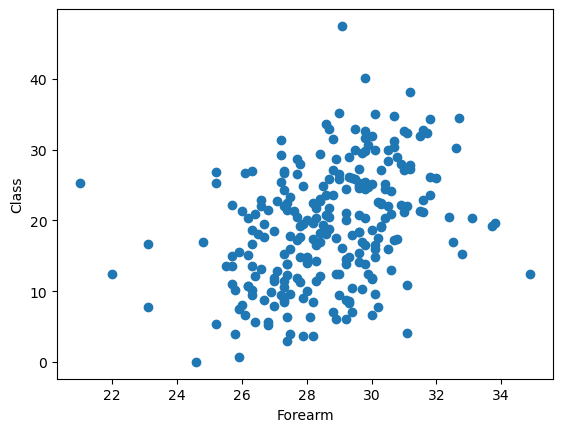

In [20]:
plt.figure()
plt.scatter(df_body_fat['Forearm'], df_body_fat['class'])
plt.xlabel('Forearm')
plt.ylabel('Class')
plt.show()

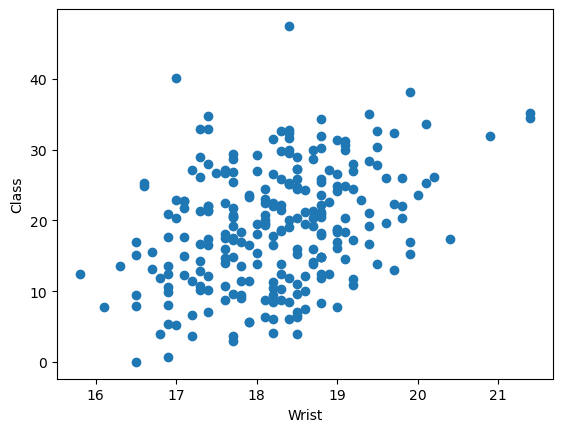

In [21]:
plt.figure()
plt.scatter(df_body_fat['Wrist'], df_body_fat['class'])
plt.xlabel('Wrist')
plt.ylabel('Class')
plt.show()

# Data Preprocessing 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_body_fat.drop('Height', axis=1),
                                                    y_body_fat,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [23]:
X_train.shape, y_train.shape

((201, 13), (201,))

In [24]:
X_test.shape, y_test.shape

((51, 13), (51,))

In [25]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

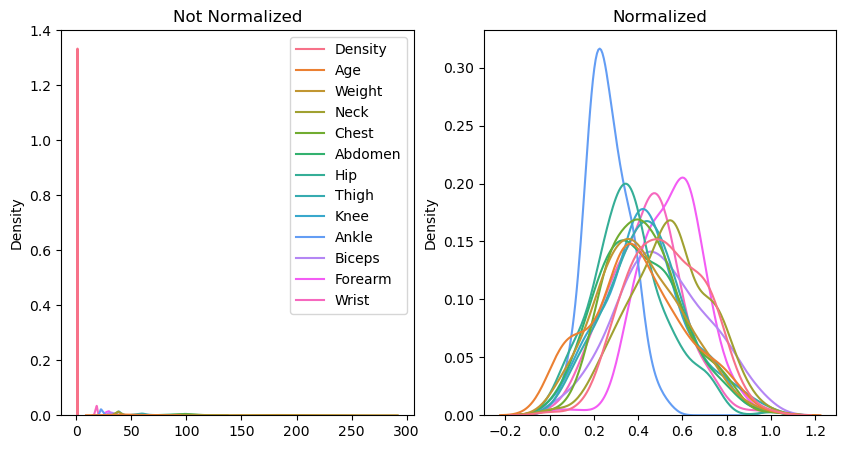

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.kdeplot(X_train)
plt.title('Not Normalized')
plt.subplot(1,2,2)
sns.kdeplot(X_train_norm, legend=None)
plt.title('Normalized')
plt.show()

# Baseline model training and evaluation

In [27]:
baseline_model = SGDRegressor().fit(X_train_norm, y_train)

In [28]:
y_preds = baseline_model.predict(X_test_norm)

In [29]:
pd.DataFrame({'Y true':y_test,
              'Y pred':y_preds})

,Y true,Y pred
165,19.2,17.180337
6,19.2,15.306888
111,28.0,28.617998
172,20.5,17.117575
115,16.7,13.229872
183,12.1,8.913003
199,23.6,18.927015
235,18.6,18.357573
9,11.7,6.271064
30,11.9,8.055045


In [30]:
print(f'R2 Score:{r2_score(y_test, y_preds)}\nMAE:{mean_absolute_error(y_test, y_preds)}\nMax error:{max_error(y_test, y_preds)}')

R2 Score:0.7606814384739735
MAE:2.7169713890979454
Max error:7.723052677655446


# Hyperparameters optimization

In [66]:
params_grid = {'loss':('squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'),
               'penalty':('l2', 'l1', 'elasticnet', None),
               'alpha':[0.0001,0.003,0.01,0.03,0.1,0.3,1.,10.],
               'learning_rate':('constant','optimal','invscaling','adaptive'),}
clf = SGDRegressor(validation_fraction=0.25)
RandSearch = RandomizedSearchCV(clf, params_grid, scoring='r2', verbose=1) 

In [67]:
rand_fit = RandSearch.fit(X_train_norm, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [68]:
best_model = rand_fit.best_estimator_

In [69]:
best_model_preds = best_model.predict(X_test_norm)

# Best estimator evaluation

In [70]:
print(f'R2 Score:{r2_score(y_test, best_model_preds)}\nMAE:{mean_absolute_error(y_test, best_model_preds)}\nMax error:{max_error(y_test, best_model_preds)}')

R2 Score:0.8454702804556723
MAE:2.093904528451074
Max error:8.842618864644145


In [71]:
pd.DataFrame({'Y true':y_test,
              'Y pred':best_model_preds})

,Y true,Y pred
165,19.2,20.091376
6,19.2,19.745830
111,28.0,31.932439
172,20.5,21.311223
115,16.7,16.116175
183,12.1,10.086828
199,23.6,24.628803
235,18.6,19.332239
9,11.7,9.714929
30,11.9,10.064955
